<a href="https://colab.research.google.com/github/alejandroaviles/WL_MACSS-2023/blob/main/Solution-Project2_Estimator_for_the_Shear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
!git clone https://github.com/alejandroaviles/WL_MACSS-2023.git

Cloning into 'WL_MACSS-2023'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 200 (delta 30), reused 0 (delta 0), pack-reused 126
Receiving objects: 100% (200/200), 70.83 MiB | 16.20 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [3]:
os.chdir('WL_MACSS-2023')  # move to repositiry folder

In [4]:
dt=np.dtype({'names':['X','Y','gamma1-v', 'gamma2-v', 'gamma1-c','gamma2-c'],'formats':[float,float,float,float,float,float]})

In [6]:
data= np.loadtxt(open('shear_data.txt'),dtype=dt)
X_data=[x[0] for x in data]
Y_data=[x[1] for x in data]
gamma1_v=[x[2] for x in data]
gamma2_v=[x[3] for x in data]
gamma1_c = [x[4] for x in data]
gamma2_c = [x[5] for x in data]

The most basic, non-trivial cosmic shear observable is the real-space shear two-point correlation function (2PCF), since it can be estimated by multiplying the ellipticities of galaxy pairs averaging.

It is mathematically convenient to write the shear as complex number $\gamma = \gamma_{1} + i\gamma_{2} = |\gamma|e^{2i\phi}$, with $\phi$ being the polar angle between the two shear components.

The two shear components of each galaxy are conveniently decomposed into **tangential component** $\gamma_{t}$, and cross-component $\gamma_{x}$. With respect to a given direction vector $\theta$ whose polar angle is $\phi$, they are defined as $\gamma_{t} = -R(\gamma e^{-2i\phi})$,     $\gamma_{x} = -I(\gamma e^{-2i\phi})$

The minus sign, by convention results in a positive value of $\gamma_{t}$ for the tangential aligment around a mass overdensity. Radial aligment around underdensities have a negative $\gamma_{t}$

A positive cross-component shear is rotated by $\pi/4$ with respect to the tangential component

In [8]:
def xitt_xixx_xitx(samplexT,sampleyT,sampleGamma1,sampleGamma2,numOfbins,maxdist):

    Num  = len(samplexT)
    hist_xitt=np.zeros(numOfbins)
    hist_xixx=np.zeros(numOfbins)
    hist_xitx=np.zeros(numOfbins)
    numInbin =np.zeros(numOfbins)

    bindist=maxdist/(numOfbins)

    for i in range(Num):
        p1x = samplexT[i]
        p1y = sampleyT[i]
        gamma1_1 = sampleGamma1[i]
        gamma2_1 = sampleGamma2[i]
        p1gamma =  gamma1_1 + 1j * gamma2_1


        for j in range(i+1,Num):
            p2x = samplexT[j]
            p2y = sampleyT[j]
            gamma1_2 = sampleGamma1[j]
            gamma2_2 = sampleGamma2[j]
            p2gamma =  gamma1_2 + 1j * gamma2_2


            dist = np.sqrt(((p2y - p1y)**2) + ((p2x - p1x)**2))

            cosangpair = (p2x - p1x)/dist
            if p2y - p1y > 0:
                sign = 1
            else:
                sign = -1

            angpair = sign * np.arccos(cosangpair)
            p1_gamma_helicity = -p1gamma * np.exp(-2j*angpair)
            p2_gamma_helicity = -p2gamma * np.exp(-2j*angpair)

            p1_gamma_t = np.real(p1_gamma_helicity)
            p1_gamma_x = np.imag(p1_gamma_helicity)
            p2_gamma_t = np.real(p2_gamma_helicity)
            p2_gamma_x = np.imag(p2_gamma_helicity)

            xi_tt = p1_gamma_t * p2_gamma_t
            xi_xx = p1_gamma_x * p2_gamma_x
            xi_tx = p1_gamma_t * p2_gamma_x


            # binning
            if(0<dist<=maxdist):
                inbin = int(dist/bindist)
                numInbin[[inbin]]  += 1
                hist_xitt[[inbin]] += xi_tt
                hist_xixx[[inbin]] += xi_xx
                hist_xitx[[inbin]] += xi_tx

    numInbin[numInbin==0]=1

    hist_xitt = np.divide(hist_xitt,numInbin)
    hist_xixx = np.divide(hist_xixx,numInbin)
    hist_xitx = np.divide(hist_xitx,numInbin)


    return hist_xitt, hist_xixx, hist_xitx,numInbin

Three two point correlators can be formed from the two shear components $\langle \gamma_{t}\gamma_{t} \rangle$, $\langle \gamma_{x}\gamma_{x} \rangle$ and $\langle \gamma_{t}\gamma_{x} \rangle$.

$\langle \gamma_{t}\gamma_{x} \rangle$ vanishes in a parity-symmetric universe, where the shear field is statistically invariant under a mirror transformation. Such a transformation leaves $\gamma_{t}$ invariant but changes the sign of $\gamma_{x}$.

The two non-zero two-point correlators are combined into the two components of the shear 2PCF

$\xi_{+}(\theta) = \langle \gamma \gamma^{*} \rangle(\theta) = \langle \gamma_{t}\gamma_{t}\rangle(\theta) + \langle \gamma_{x}\gamma_{x}\rangle(\theta)$

$\xi_{-}(\theta) = R [\langle \gamma\gamma \rangle(\theta)e^{-4i\phi}] = \langle \gamma_{t}\gamma_{t}\rangle(\theta) - \langle \gamma_{x}\gamma_{x}\rangle(\theta)$

An estimator of the 2PCF is

$\hat{\xi}_{\pm} = \frac{\sum_{ij}\omega_{i}\omega_{j}(\epsilon_{t,i}\epsilon_{t,j}\pm \epsilon_{x,i}\epsilon_{x,j})}{\sum_{ij}\omega_{i}\omega_{j}}$

The sum extends over pairs of galaxies $(i,j)$ at positions on the sky $\theta_{i}$ and $\theta_{j}$, respectively, whose separation $|\theta_{i} - \theta_{j}|$ lies in an angular distance bin around $\theta$.

Each galaxy has a measured ellipticity $\epsilon_{i}$, and an attributed weight $\omega_{i}$, which may reflect the measurement uncertainty.

In [10]:
xitt, xixx, xitx,numInbin = xitt_xixx_xitx(X_data,Y_data,gamma1_c,gamma2_c,numOfbins = 10,maxdist = 2.828)
xiplus = xitt + xixx
ximinus = xitt - xixx
xicross = xitx

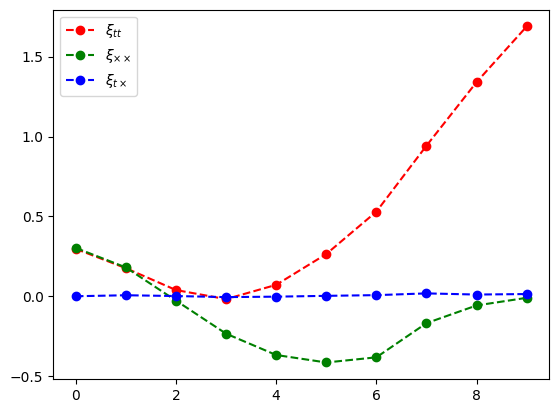

In [11]:
plt.plot(xitt, 'r--o', label="$\\xi_{tt}$")
plt.plot(xixx,'g--o', label="$\\xi_{\\times\\times}$")
plt.plot(xicross,'b--o', label="$\\xi_{t\\times}$")
plt.legend()
plt.show()

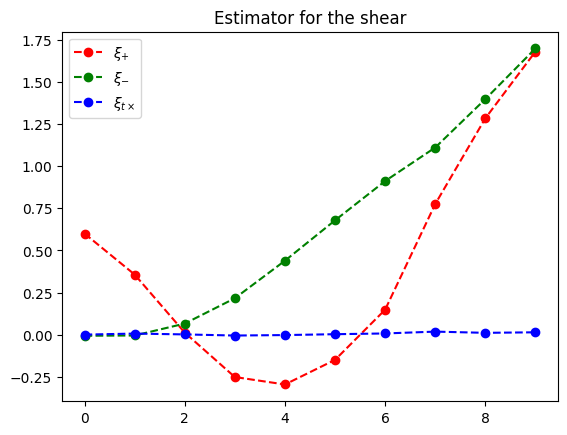

In [17]:
plt.plot(xiplus, 'r--o', label="$\\xi_{+}$")
plt.plot(ximinus,'g--o', label="$\\xi_{-}$")
plt.plot(xicross,'b--o', label="$\\xi_{t\\times}$")
plt.title("Estimator for the shear")
plt.legend()
plt.show()

In [15]:
xitt2, xixx2, xitx2,numInbin2 = xitt_xixx_xitx(X_data,Y_data,gamma1_v,gamma2_v,numOfbins = 10,maxdist = 2.828)
xiplus2 = xitt2 + xixx2
ximinus2 = xitt2 - xixx2
xicross2 = xitx2

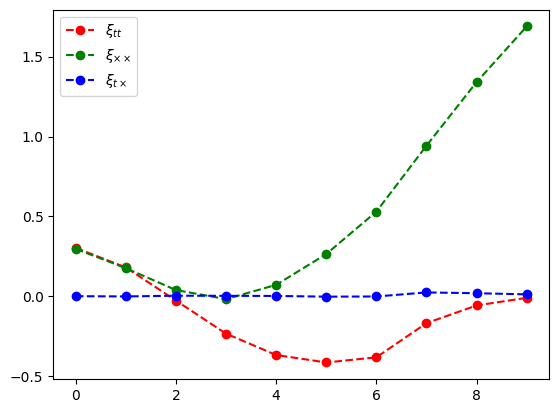

In [16]:
plt.plot(xitt2, 'r--o', label="$\\xi_{tt}$")
plt.plot(xixx2,'g--o', label="$\\xi_{\\times\\times}$")
plt.plot(xicross2,'b--o', label="$\\xi_{t\\times}$")
plt.legend()
plt.show()

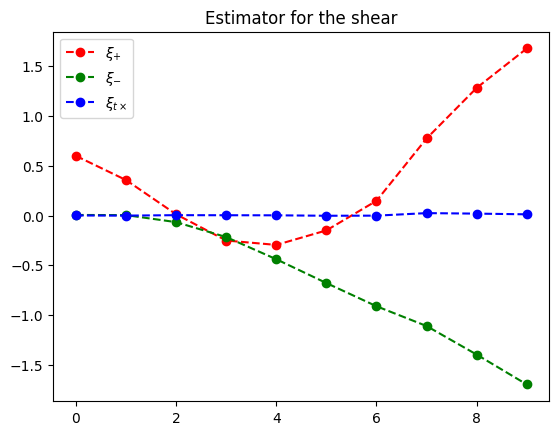

In [18]:
plt.plot(xiplus2, 'r--o', label="$\\xi_{+}$")
plt.plot(ximinus2,'g--o', label="$\\xi_{-}$")
plt.plot(xicross2,'b--o', label="$\\xi_{t\\times}$")
plt.title("Estimator for the shear")
plt.legend()
plt.show()

All information presented here was taken from Kilbinger M. (2015) *Cosmology with cosmic shear observations: a review*

For more information: https://drive.google.com/file/d/14skR3BjoK0JqdU4snd_o16O9BHXoS0Tm/view